# Feature selection techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
df = pd.read_csv("C:\\Users\\Dinu\\Downloads\\machine learning practice\\mobile_dataset.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
df.shapeb

(2000, 21)

In [9]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [13]:
duplicateColumnNames = getDuplicateColumns(df)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


In [21]:
df['battery_power'].sort_values(ascending = True)[:10]

625     501
1115    501
1618    502
1027    502
736     503
24      503
1265    503
540     504
1844    504
1039    504
Name: battery_power, dtype: int64

In [26]:
df['battery_power'].nlargest()

1354    1998
309     1997
753     1996
1682    1996
292     1995
Name: battery_power, dtype: int64

In [30]:
X = df.iloc[:,:-1]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [32]:
y = df['price_range']
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

# chi2 test 
this gives the scores of the importance of the features wrt the o/p or y values


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
ordered_rank_features = SelectKBest(score_func=chi2, k=20)
ordered_features = ordered_rank_features.fit(X,y)

In [37]:
ordered_features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [41]:
df_scores = pd.DataFrame(ordered_features.scores_ , columns=['scores'])
df_scores.head()

,scores
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166


In [42]:
df_columns = pd.DataFrame(X.columns)
df_columns.head()

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [48]:
feature_select = pd.concat([df_columns, df_scores], axis=1)

feature_select


,0,scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [50]:
feature_select.nlargest(10, 'scores')

,0,scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# ExtraTreesClassifier


In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

In [53]:
model.feature_importances_

array([0.06060109, 0.02005518, 0.03324573, 0.01970062, 0.03220066,
       0.01721325, 0.03527753, 0.03239295, 0.03666548, 0.03310274,
       0.03369187, 0.04678351, 0.04852986, 0.39556919, 0.03376571,
       0.03421931, 0.03501729, 0.01371074, 0.01902641, 0.01923086])

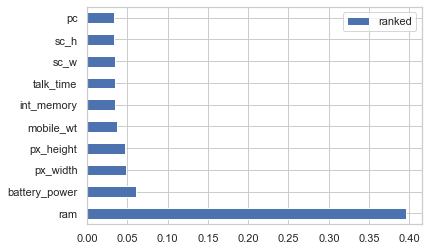

In [65]:
ranked_features = pd.DataFrame(model.feature_importances_ ,columns=['ranked'], index=X.columns)
ranked_features.nlargest(10, 'ranked')
ranked_features.nlargest(10, 'ranked').plot(kind='barh')
plt.show()

# correlation

<AxesSubplot:>

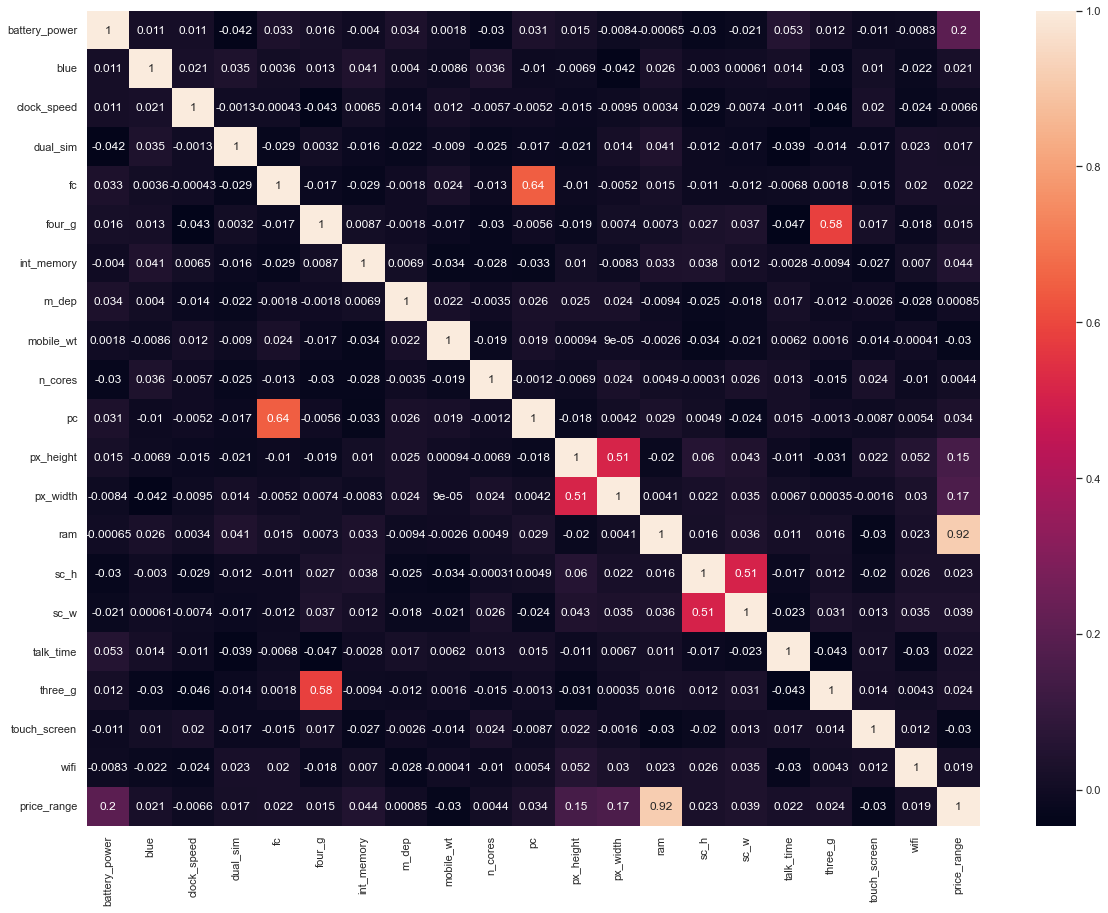

In [70]:
corr = df.corr()
top_features = corr.index
df[top_features].corr()
plt.figure(figsize=(20,15))
sns.heatmap(df[top_features].corr(), annot=True)

<AxesSubplot:>

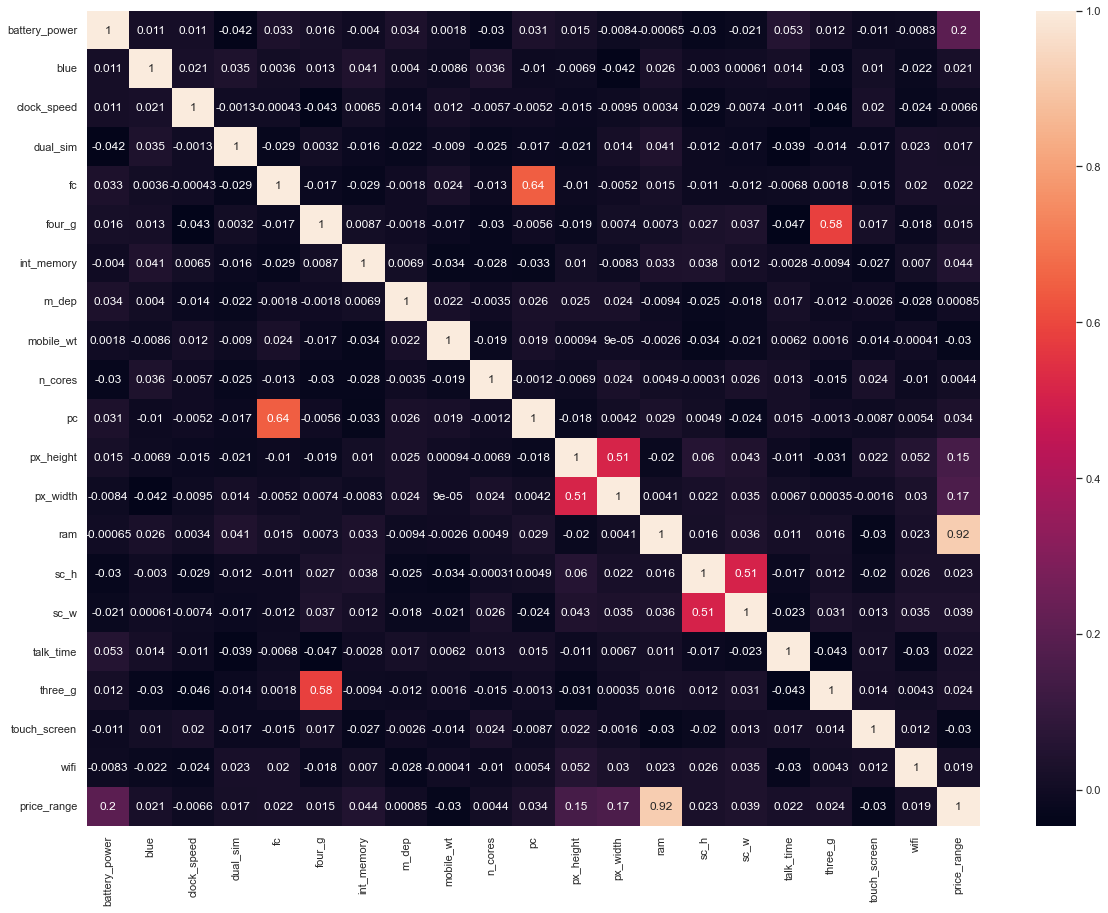

In [72]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

In [83]:
def correlation(dataset, target_value):
    col_corr = set()
    cor_matrix = dataset.corr()
    
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j]) > target_value:
                col_name = cor_matrix.columns[i]
                col_corr.add(col_name)
    
    return col_corr 
            
    
    
threshold = 0.5
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

# Information Gain 

In [84]:
from sklearn.feature_selection import mutual_info_classif

In [85]:
mutual_info = mutual_info_classif(X,y)

In [107]:
mutual_series = pd.DataFrame(mutual_info, index=X.columns, columns=['values'])
mutual_series.nlargest(20,'values')

,values
ram,0.848784
battery_power,0.032114
px_width,0.030649
px_height,0.020182
wifi,0.013411
int_memory,0.011358
four_g,0.007593
n_cores,0.006735
m_dep,0.005932
mobile_wt,0.003564
